<a href="https://colab.research.google.com/github/tezz-io/ds_lab/blob/main/POSTagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf MKB.csv
!wget https://media.githubusercontent.com/media/tezz-io/ds_lab/main/output/MKB.csv

--2021-11-11 03:23:37--  https://media.githubusercontent.com/media/tezz-io/ds_lab/main/output/MKB.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2973553 (2.8M) [text/plain]
Saving to: ‘MKB.csv’

MKB.csv             100%[===================>]   2.83M  --.-KB/s    in 0.07s   

2021-11-11 03:23:38 (42.7 MB/s) - ‘MKB.csv’ saved [2973553/2973553]



In [5]:
from textblob import TextBlob
import pandas as pd

df = pd.read_csv('MKB.csv')

string = ""
for i, r in df.iterrows():
  string += r['Content'] + " " 

len(string)

1793455

In [9]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

blob = TextBlob(string)
df1 = pd.DataFrame()
words = []
tags = []
x = blob.tags
for i in x:
  words.append(i[0])
  tags.append(i[1])

df1['word'] = words
df1['tag'] = tags

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [10]:
df1.head()

,word,tag
0,My,PRP$
1,dear,JJ
2,countrymen,NNS
3,Namaskar…namaskar,NNP
4,a,DT


In [17]:
x = set(df1.tag)
x

{'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB'}

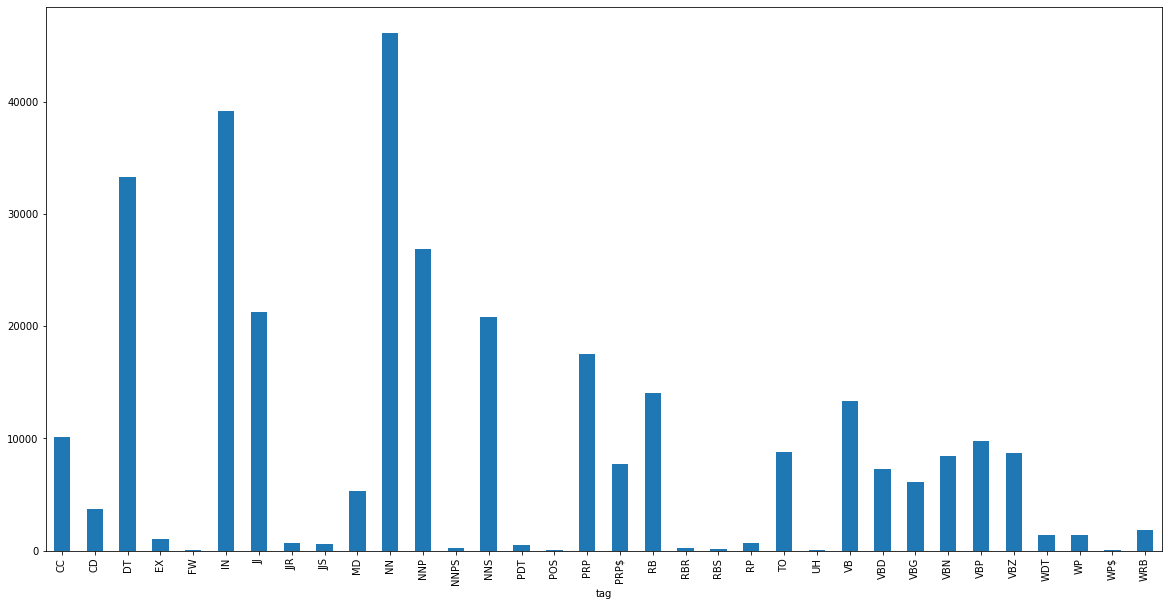

In [27]:
s1 = df1.groupby('tag')['word'].count()
s1.plot.bar(figsize=(20,10))

In [28]:
s1

tag
CC      10131
CD       3743
DT      33323
EX       1004
FW         51
IN      39122
JJ      21267
JJR       709
JJS       572
MD       5298
NN      46127
NNP     26858
NNPS      257
NNS     20765
PDT       534
POS        10
PRP     17501
PRP$     7668
RB      14071
RBR       256
RBS       106
RP        696
TO       8820
UH         86
VB      13340
VBD      7262
VBG      6097
VBN      8435
VBP      9783
VBZ      8725
WDT      1358
WP       1359
WP$        48
WRB      1789
Name: word, dtype: int64